# **Lab 2: Intro to ggplot2 package**

## **Buliding block of ggplot2 graphical objects**

*   data
*   aesthetic mapping
*   geometric objects
*   statistical transformaons
*   facets
*   scales
*   coordinate system
*   positioning adjustment





```
ggplot(data = <DATA>) +
GEOM_FUNCTION(
mapping = aes(<mappings>),
stat = <statistic transformation>,
position = <position options>,
color = <fixed color>,
<other arguments>) +
FACET_FUNCTION(<facet options>) +
SCALE_FUNCTION(<scale options>) +
theme(<theme elements>)
```

In [0]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [0]:
dsmall <- sample_n(diamonds, 1000)
summary(dsmall)

     carat               cut      color      clarity        depth      
 Min.   :0.2300   Fair     : 30   D:121   SI1    :258   Min.   :54.40  
 1st Qu.:0.4000   Good     : 87   E:179   VS2    :223   1st Qu.:61.10  
 Median :0.7000   Very Good:241   F:172   SI2    :173   Median :61.90  
 Mean   :0.8183   Premium  :247   G:194   VS1    :139   Mean   :61.78  
 3rd Qu.:1.0725   Ideal    :395   H:159   VVS2   : 98   3rd Qu.:62.50  
 Max.   :3.0100                   I:115   VVS1   : 60   Max.   :68.20  
                                  J: 60   (Other): 49                  
     table           price             x               y        
 Min.   :53.00   Min.   :  362   Min.   :0.000   Min.   :0.000  
 1st Qu.:56.00   1st Qu.:  923   1st Qu.:4.710   1st Qu.:4.728  
 Median :57.00   Median : 2400   Median :5.690   Median :5.705  
 Mean   :57.41   Mean   : 4047   Mean   :5.754   Mean   :5.759  
 3rd Qu.:59.00   3rd Qu.: 5550   3rd Qu.:6.570   3rd Qu.:6.580  
 Max.   :65.00   Max.   :18692   M

## **Geometric objects**

Geometric objects are the actual elements you put on the plot. Examples include:

*   points (geom_point(), used for scatter plots)
*   text (geom_text(), geom_label(), used for text labels)
*   lines (geom_line(), used for time series, trend lines, etc.)
*   boxplots (geom_boxplot() used for boxplots)

To get a list of available geometric objects use the following:


```
help.search("geom_", package = "ggplot2")
```




### **Scatter plots**

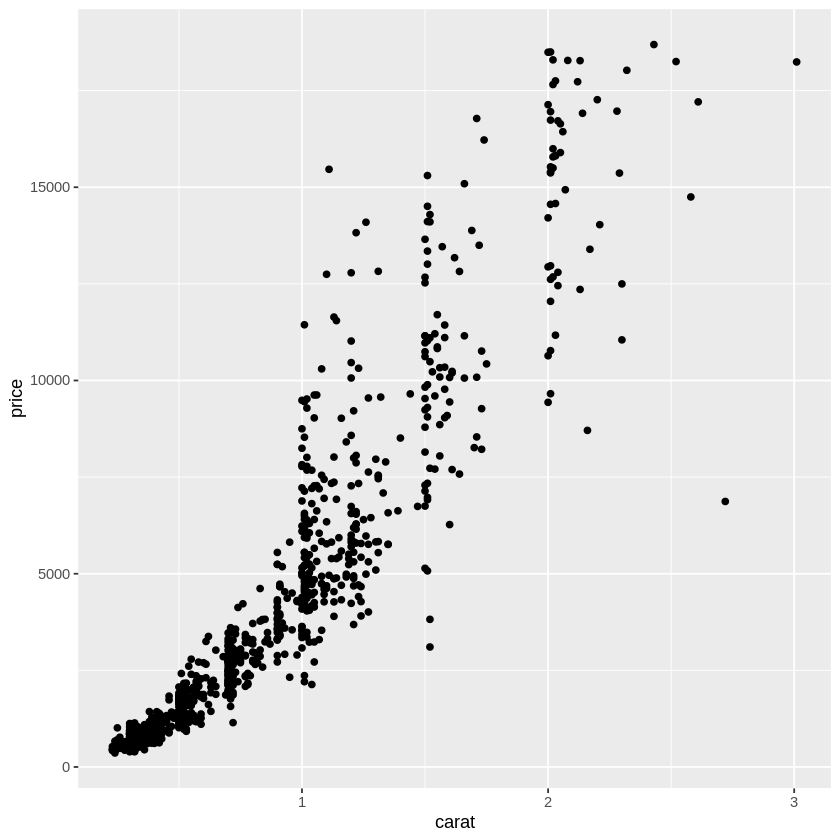

In [0]:
p <- ggplot(dsmall, aes(x = carat, y = price))
p + geom_point()

### **Text label plots**

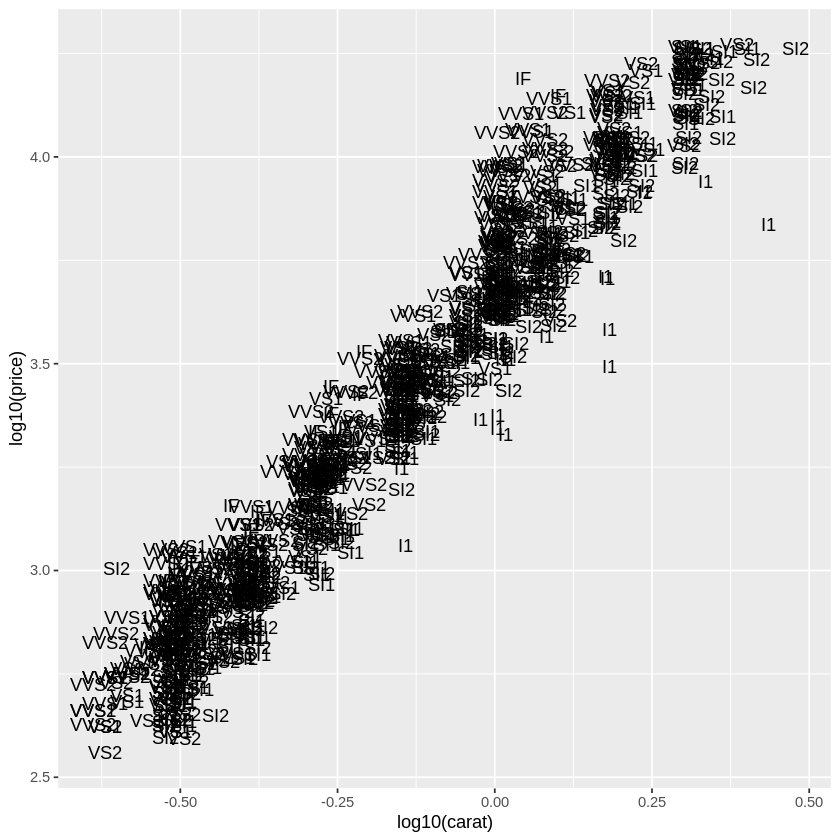

In [0]:
plog <- ggplot(
dsmall,
aes(x = log10(carat), y = log10(price)))
plog + geom_text(aes(label = clarity))

### **Text plots with rectangle plates**



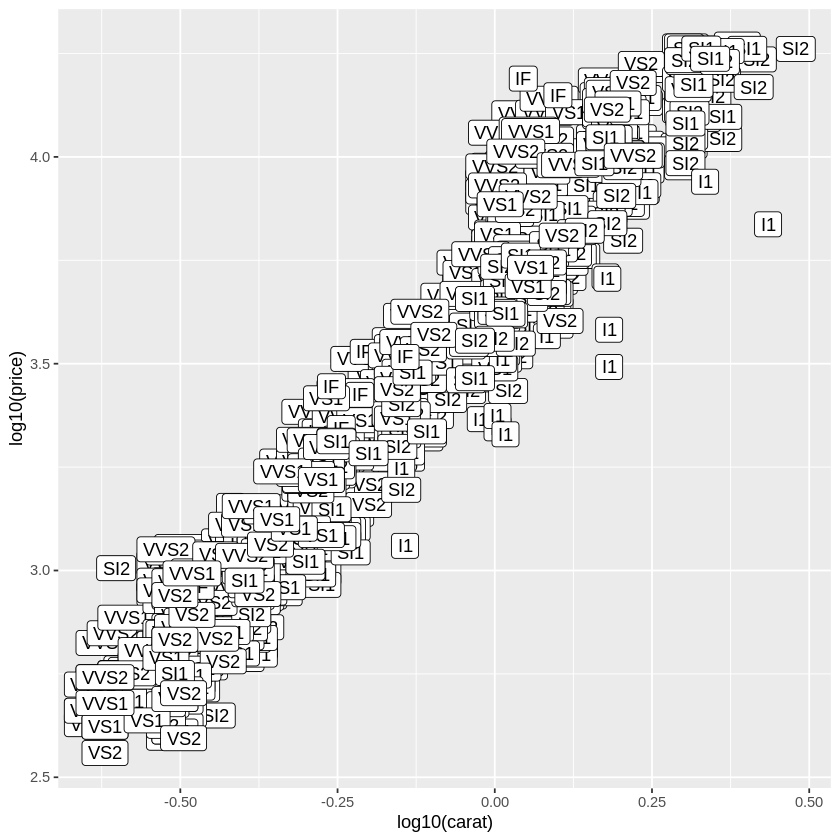

In [0]:
plog + geom_label(aes(label = clarity))

## **Aesthetic mappings**

Aesthetics are properties you can see:

*   postion (i.e., on the x and y axes)
*   shape
*   linetype
*   size
*   color (“outside” color)
*   fill (“inside” color)



### **The shape of points**

Warning message:
“Using shapes for an ordinal variable is not advised”
Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 8. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 93 rows containing missing values (geom_point).”


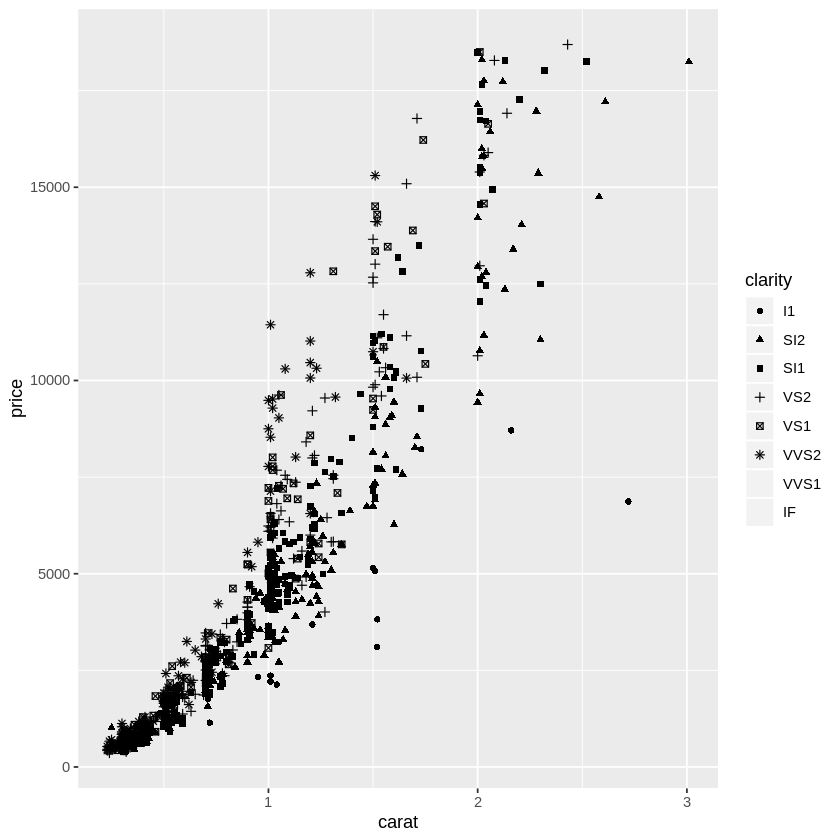

In [0]:
p1 <- ggplot(dsmall, aes(x = carat, y = price))
# set shape by diamond clarity
p1 + geom_point(aes(shape = clarity))

### **The color of points**

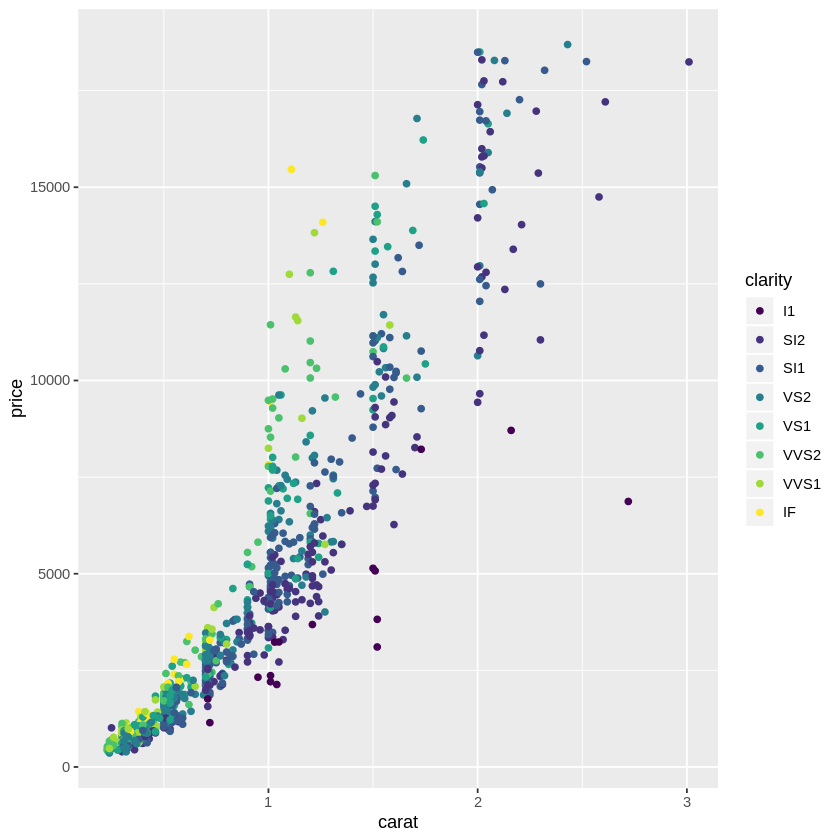

In [0]:
# color by diamonds clarity
p1 + geom_point(aes(color = clarity))

### **Marker points with borders**

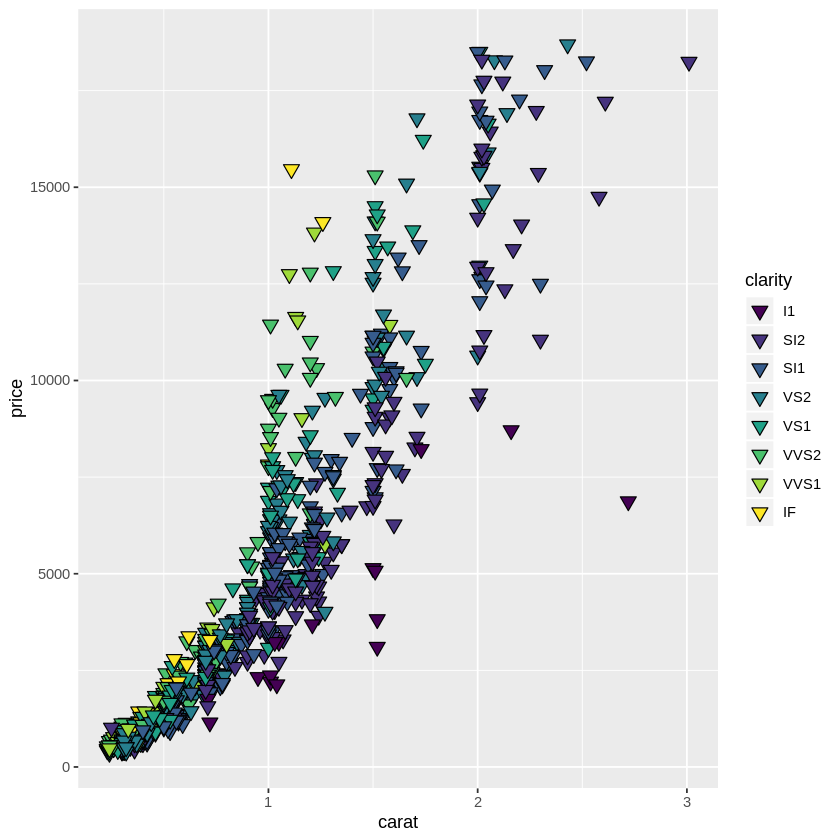

In [0]:
p1 + geom_point(aes(fill = clarity), size = 3, color = "black", shape = 25)

### **Alpha parameter for transparency**

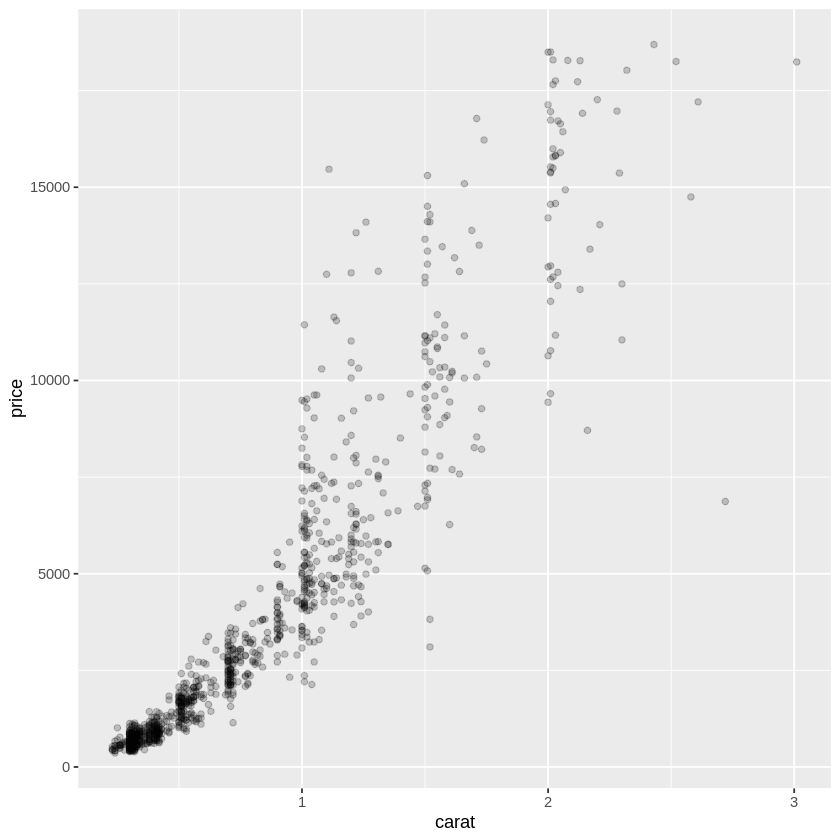

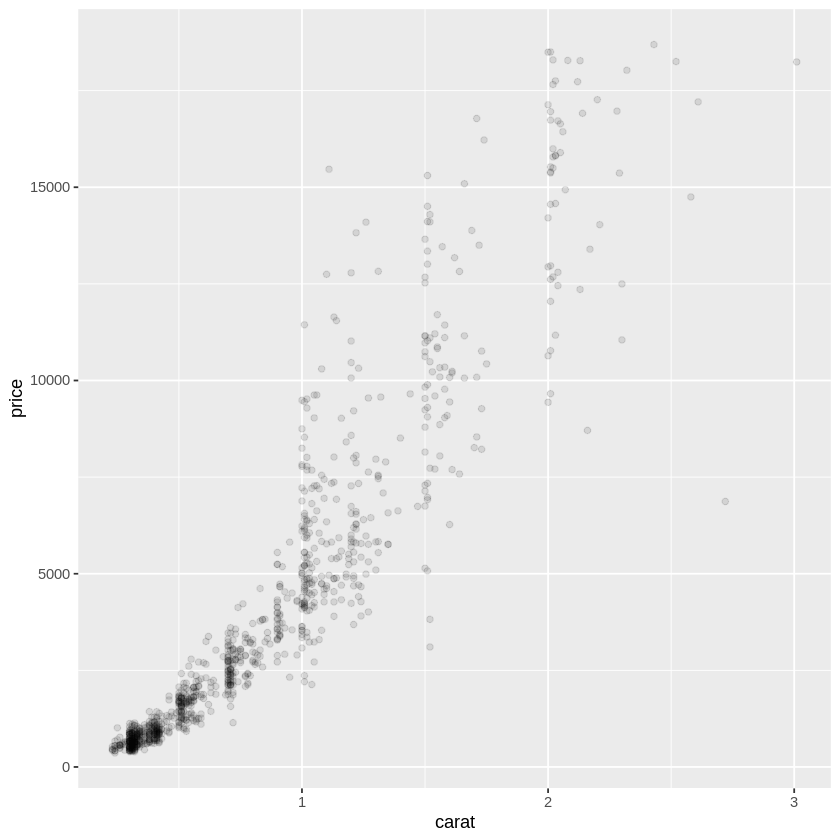

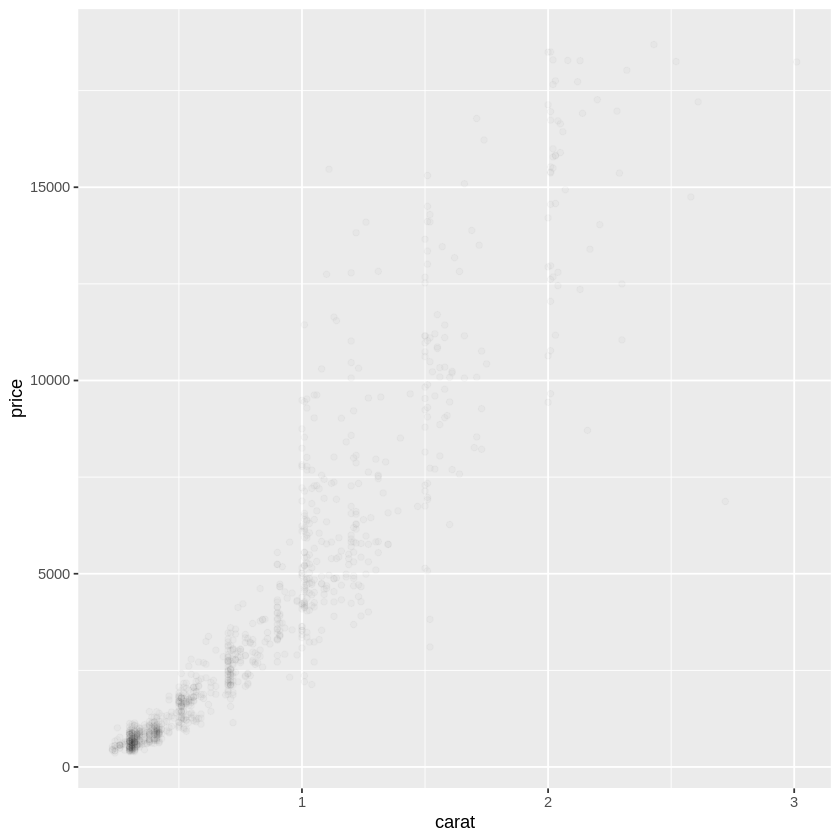

In [0]:
a1 <- p + geom_point(alpha = 1/5)
a2 <- p + geom_point(alpha = 1/10)
a3 <- p + geom_point(alpha = 1/50)
a1
a2
a3

## **Scales**

### **Scales for the axes**

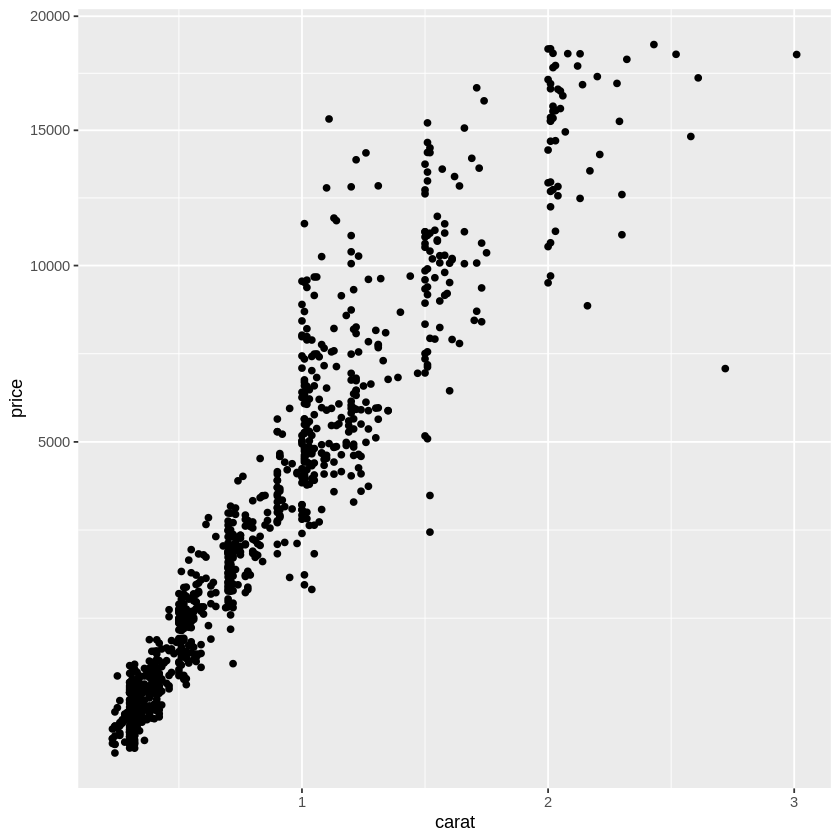

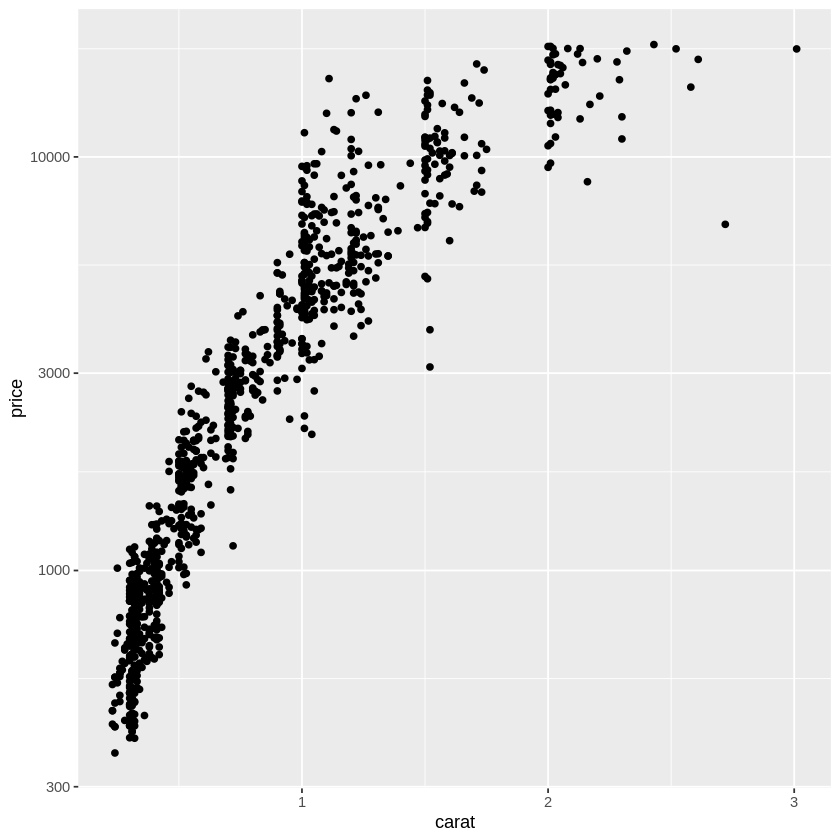

In [0]:
# Square root y-axis transformation
p1 <- ggplot(dsmall, aes(x = carat, y = price))
psqrt <- p1 + geom_point() + scale_y_sqrt()
psqrt
# Log base 10 y-axis transformation
plog10 <- p1 + geom_point() + scale_y_log10()
# Log base 10 y-axis transformation
plog10

Log base 10 transformaon of x and y axes. Why would log-log plot make sense?


*   Log-log plot describes the relationship $Price = c \cdot Carat^k$ for some constant $c, k > 0$.
$$Price = c \cdot Carat^k\Rightarrow\log Price = \log c + k\log Carat$$
*   You can see that once we transform both variables with log, we have a linear relationship between $\log Price$ and $\log Carat$.



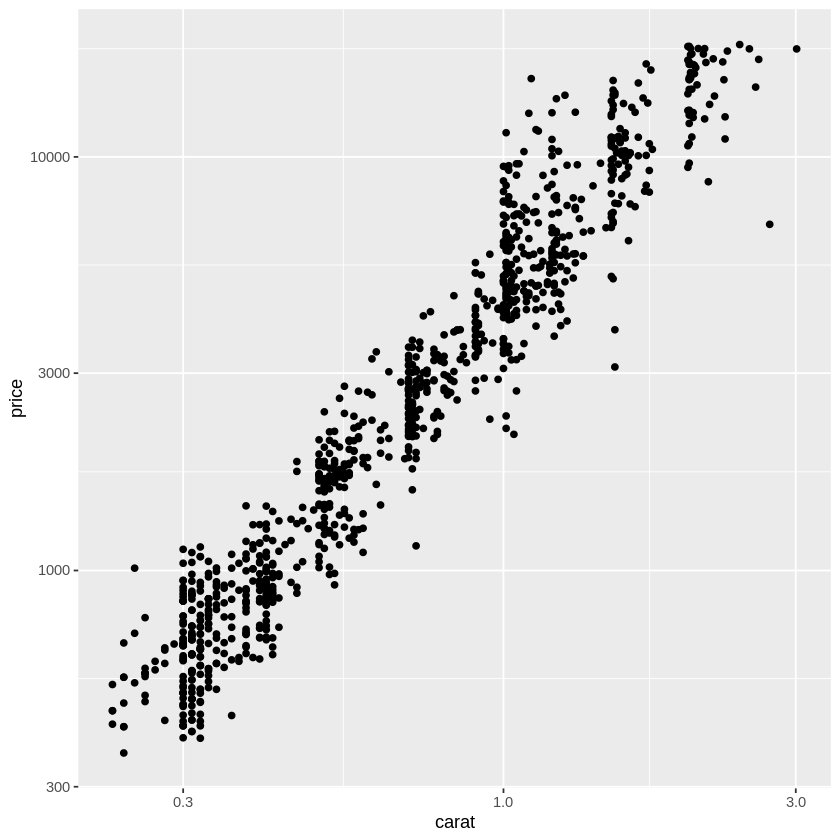

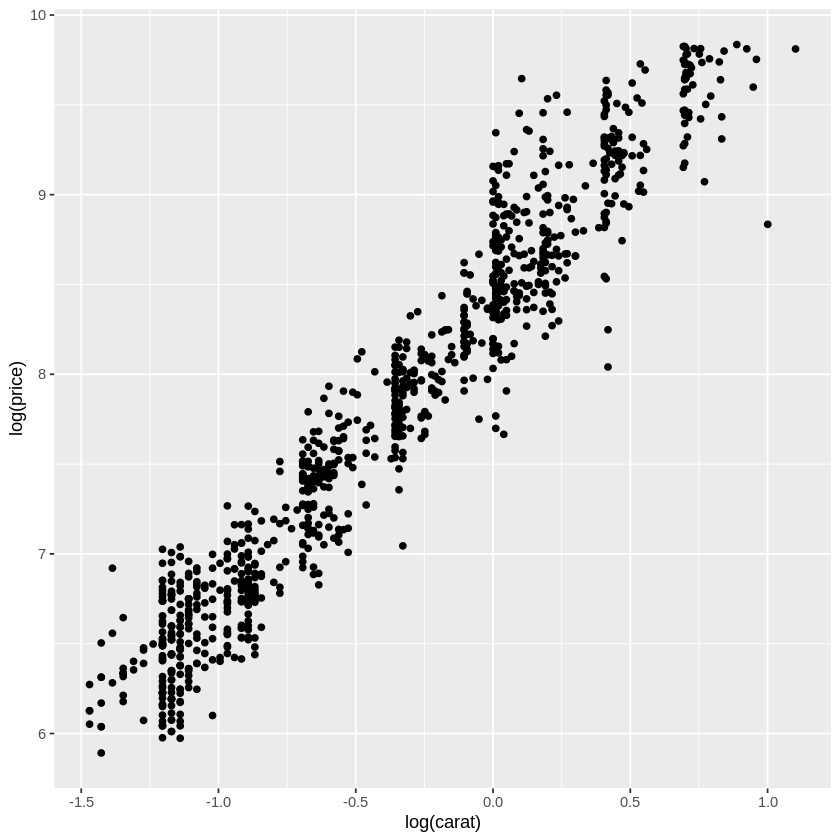

In [0]:
ploglog1 <- p1 + geom_point() + scale_y_log10() + scale_x_log10()
ploglog1
ploglog2 <- ggplot(dsmall, aes(x = log(carat), y = log(price))) + geom_point()
ploglog2

## **Faceting**

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



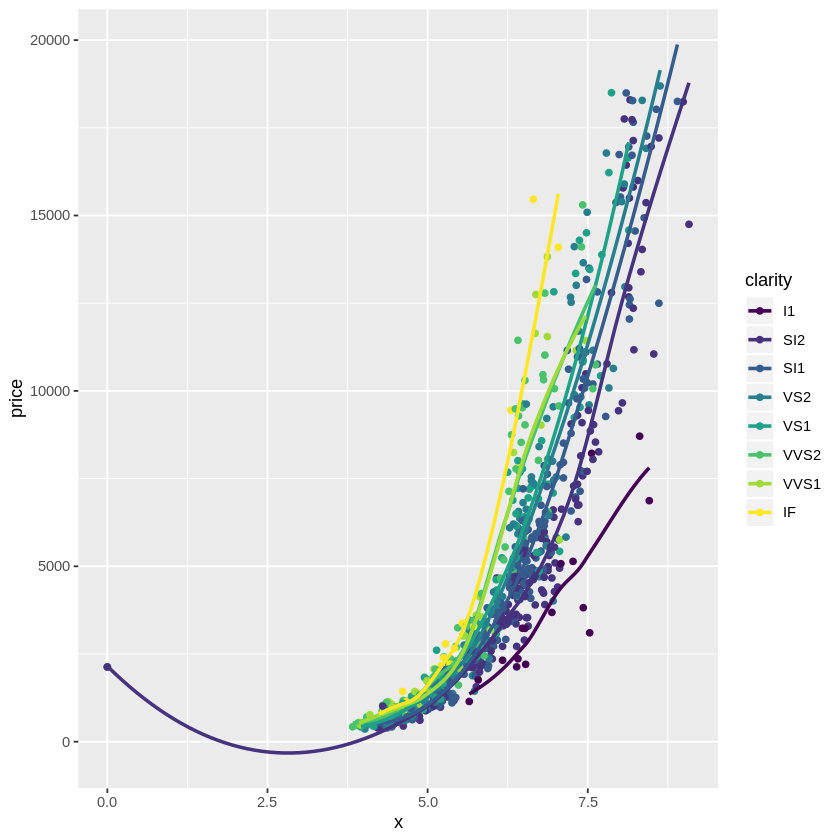

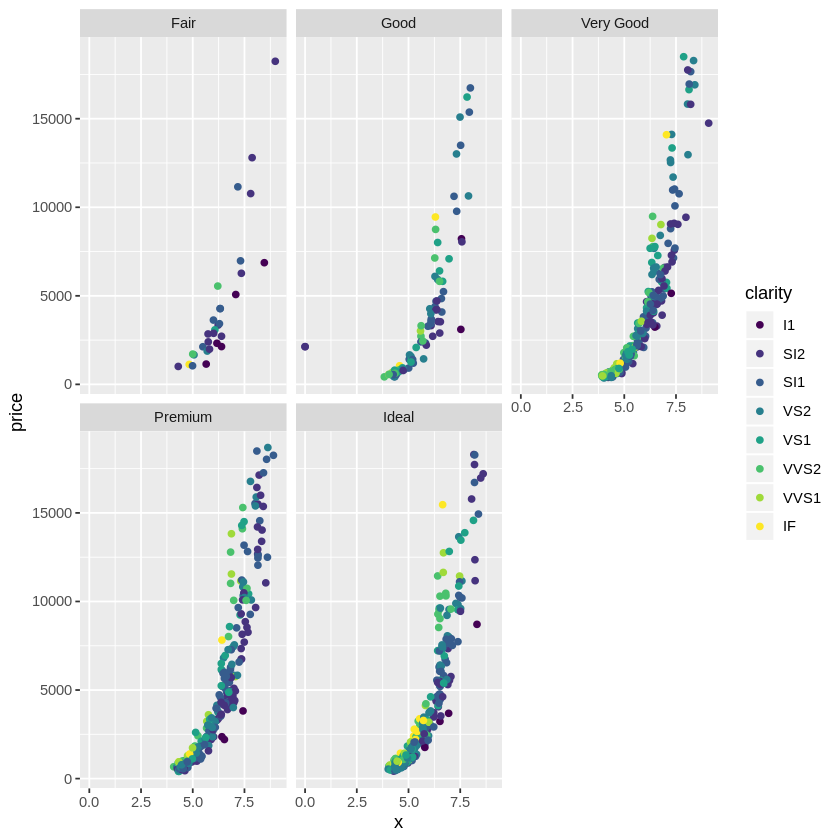

In [0]:
p0 <- ggplot(data = dsmall) + 
geom_point(mapping = aes(x = x, y = price, color = clarity)) +
geom_smooth(mapping = aes(x = x, y = price, color = clarity), se = F)
p0
p1 <- ggplot(data = dsmall) + 
geom_point(mapping = aes(x = x, y = price, color = clarity)) + facet_wrap(~ cut, nrow = 2)
p1

### **Exercise**

1.   How to reduce the code duplication above? "(x=x, y=price)" is in both lines.
2.   In the above fit, use linear model instead of locally weighted scatterplot smoother.
3.   In the above fit, use general additive model instead of locally weighted scatterplot smoother.(method = "gam", formula = y ~ s(x, bs = "cs"))(The formula part cannot be omitted, please refer to https://www.rdocumentation.org/packages/ggplot2/versions/3.2.1/topics/geom_smooth)


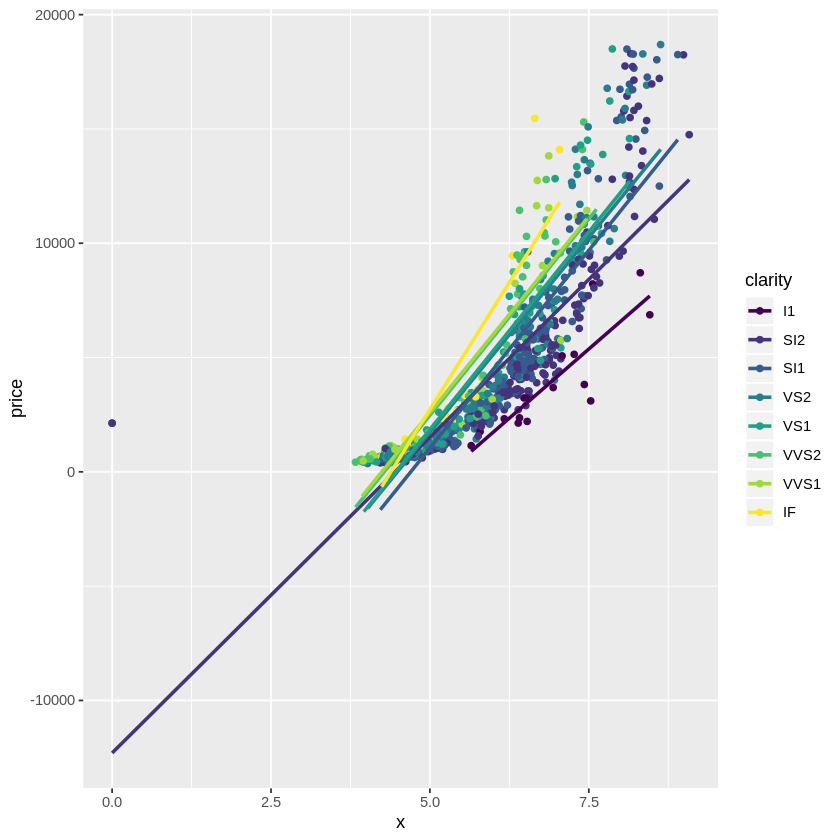

In [0]:
p2 <- ggplot(data = dsmall) + 
geom_point(mapping = aes(x = x, y = price, color = clarity)) +
geom_smooth(mapping = aes(x = x, y = price, color = clarity), se = F, method = "lm")
p2

### **Exercise**



1.   What does show.legend = FALSE do? What happens if you remove it?
2.   What does the se argument to geom_smooth() do?



## **Statistical Transformations**

### **Types of statistical transformaons**

*   **boxplots**: the the median, lower and upper quartiles,
*   **histograms**: group the values into bins,
*   **bar charts**: number of class occurrences,
*   **smoothers**: predicon lines / predicted y-values.

### **Box plot transformation**

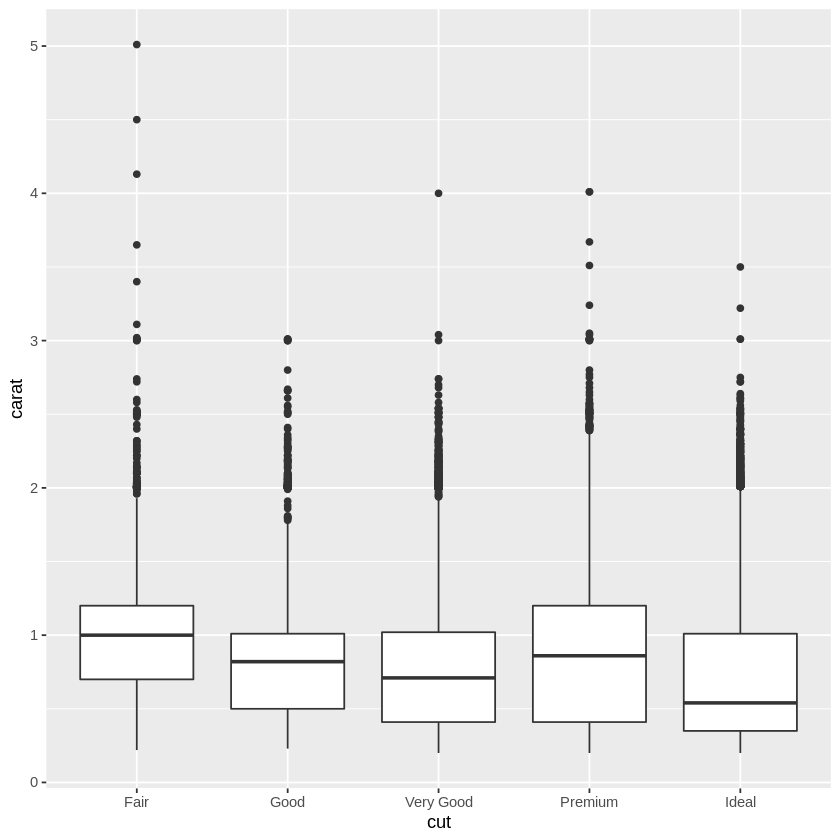

In [0]:
ggplot(data = diamonds, aes(x = cut, y =carat)) +
geom_boxplot()

### **Histogram and density plots**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



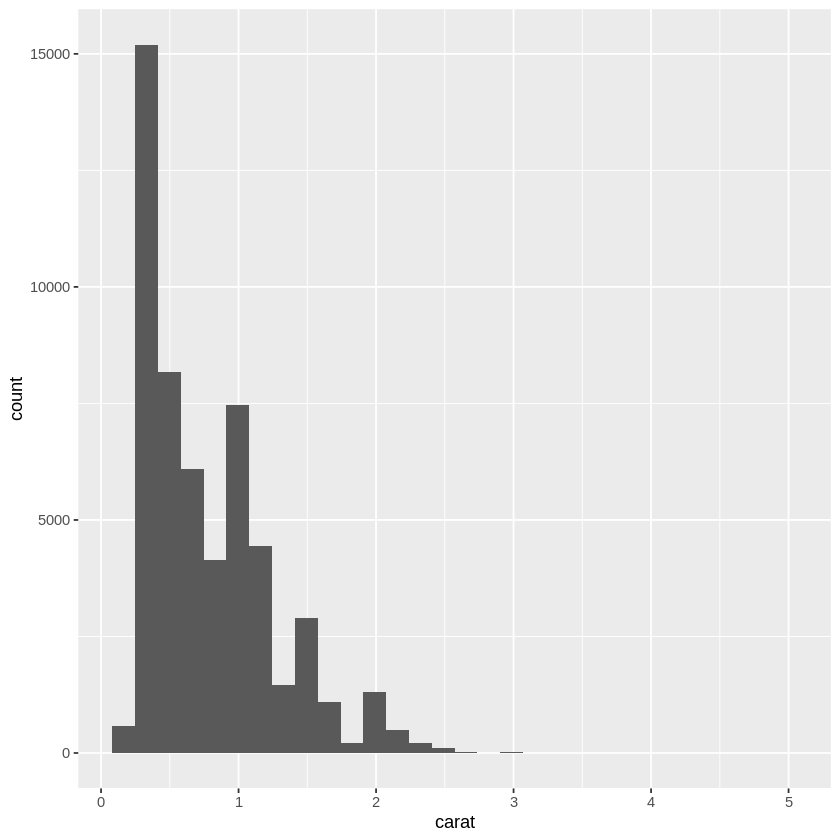

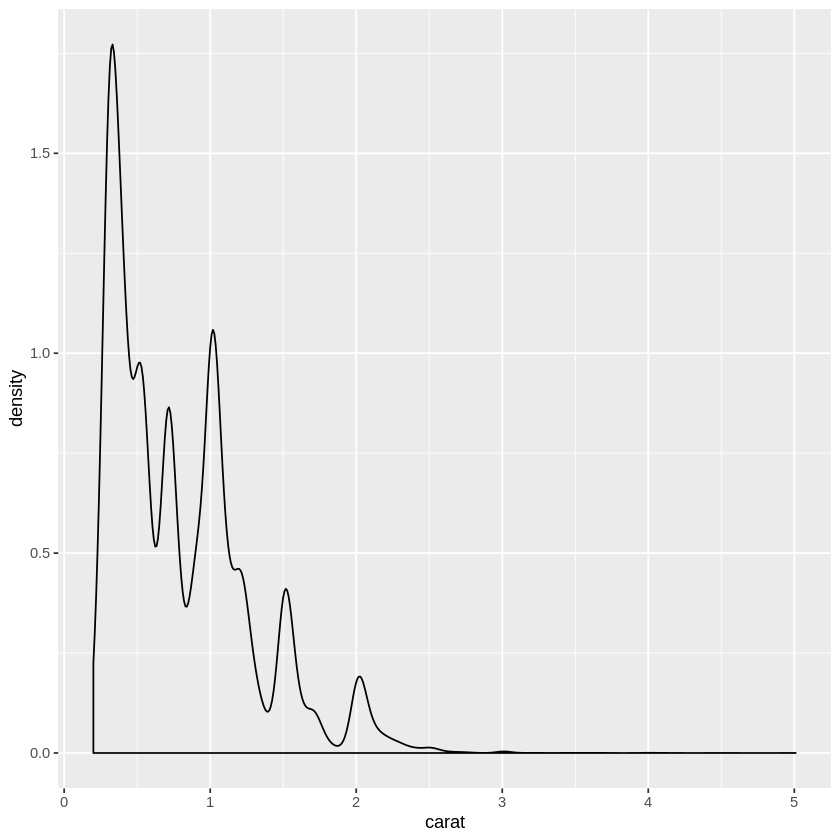

In [0]:
# Distribution of the carats (weights) of the diamonds.
ggplot(data = diamonds, aes(x = carat)) + geom_histogram()
ggplot(data = diamonds, aes(x = carat)) + geom_density()


### **Histograms for separate groups**

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 6 rows containing missing values (geom_bar).”
Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


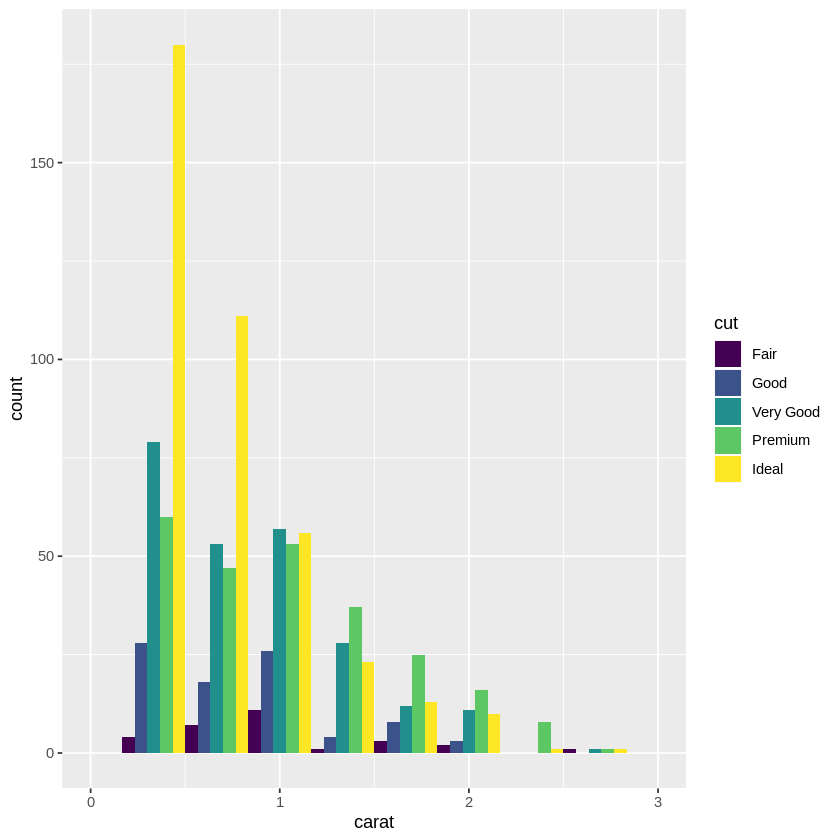

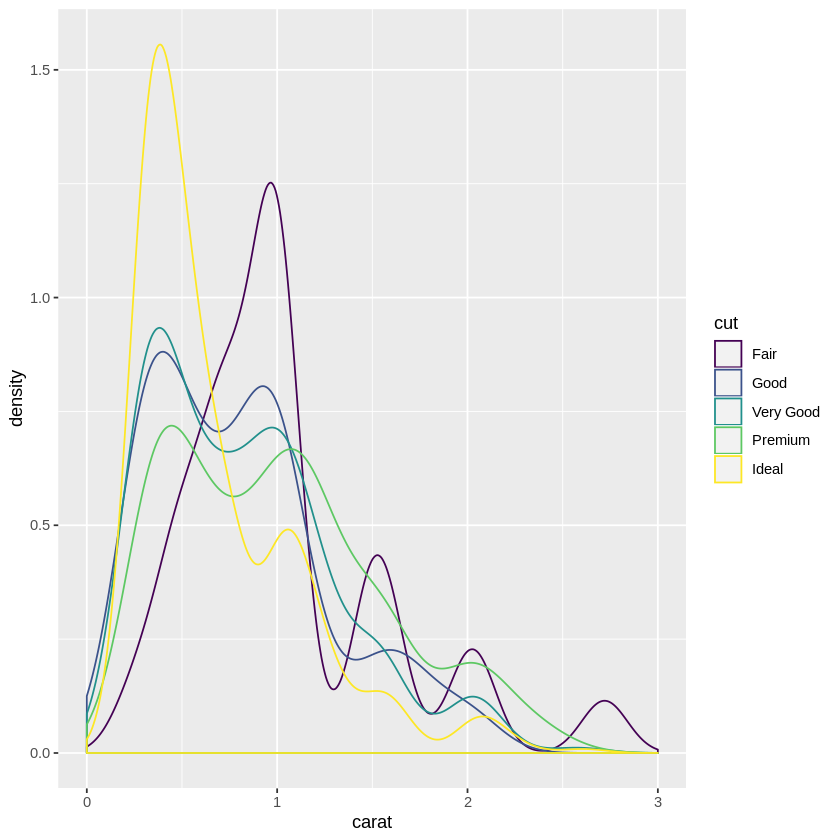

In [0]:
# Here we show grouping by diamonds cut.
p <- ggplot(data = dsmall, aes(x = carat)) + xlim(0, 3)
p1 <- p + geom_histogram(aes(fill = cut), position = "dodge", bins = 10)
p1
p2 <- p + geom_density(aes(color = cut))
p2

Instead of marginal distributions, we can plot distribution of components stacked on top of each other to see the contribution from each of group.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 10 rows containing missing values (geom_bar).”
Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


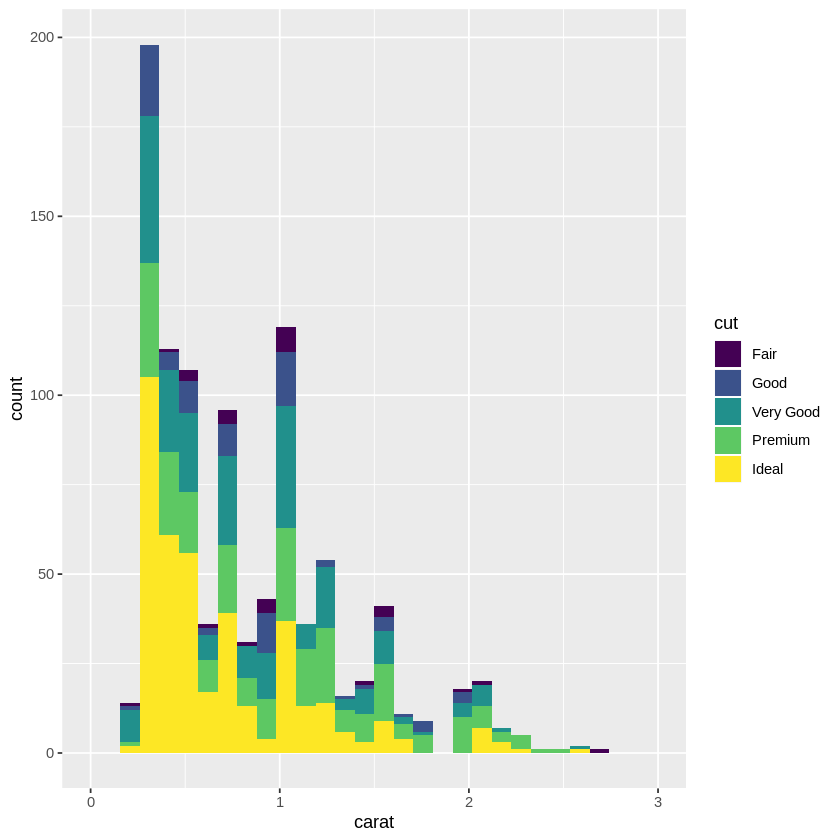

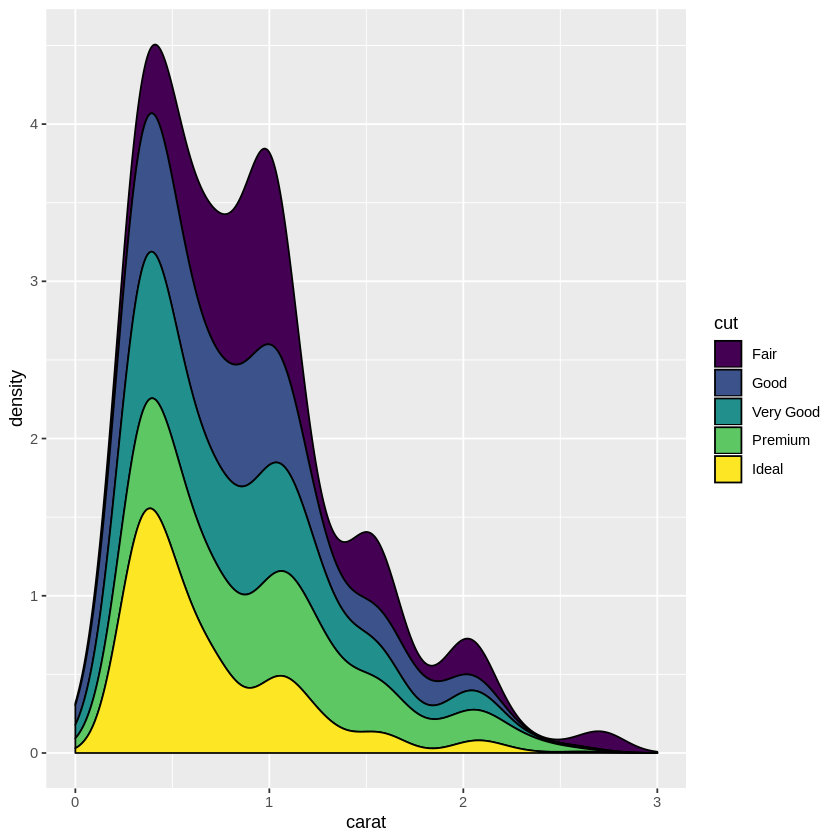

In [0]:
h <- p + geom_histogram(aes(fill = cut), position = "stack")
d <- p + geom_density(aes(fill = cut), position = "stack")
h
d

### **Position adjustment**

Overploting: many points overlap each other. Here variables are categorical, but sometimes rounding causes overploting.

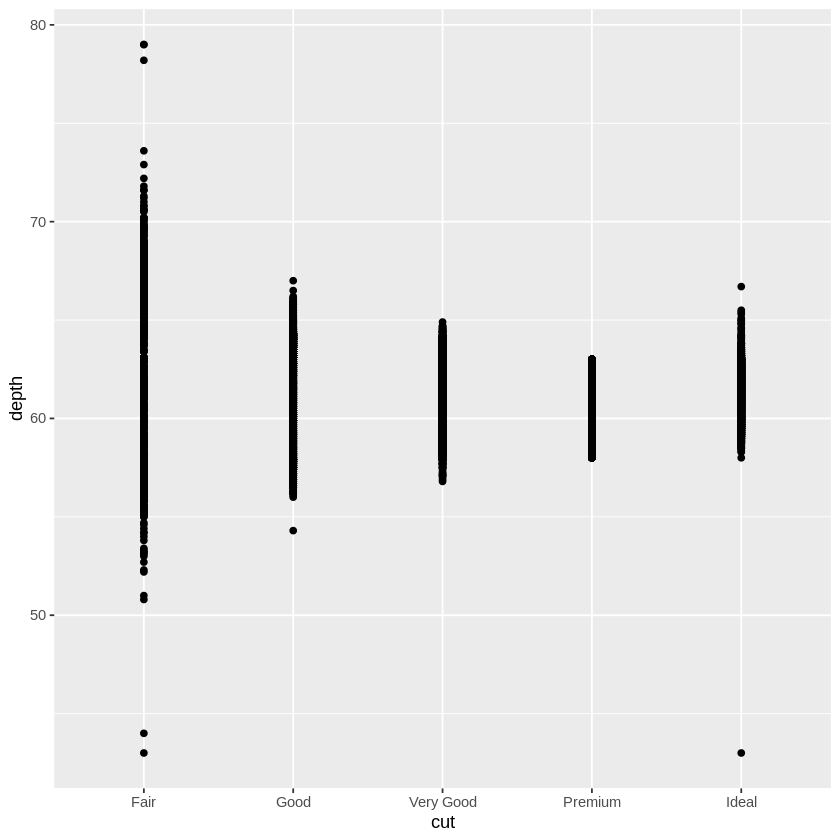

In [0]:
plt <- ggplot(diamonds, aes(x = cut, y = depth))
plt + geom_point()

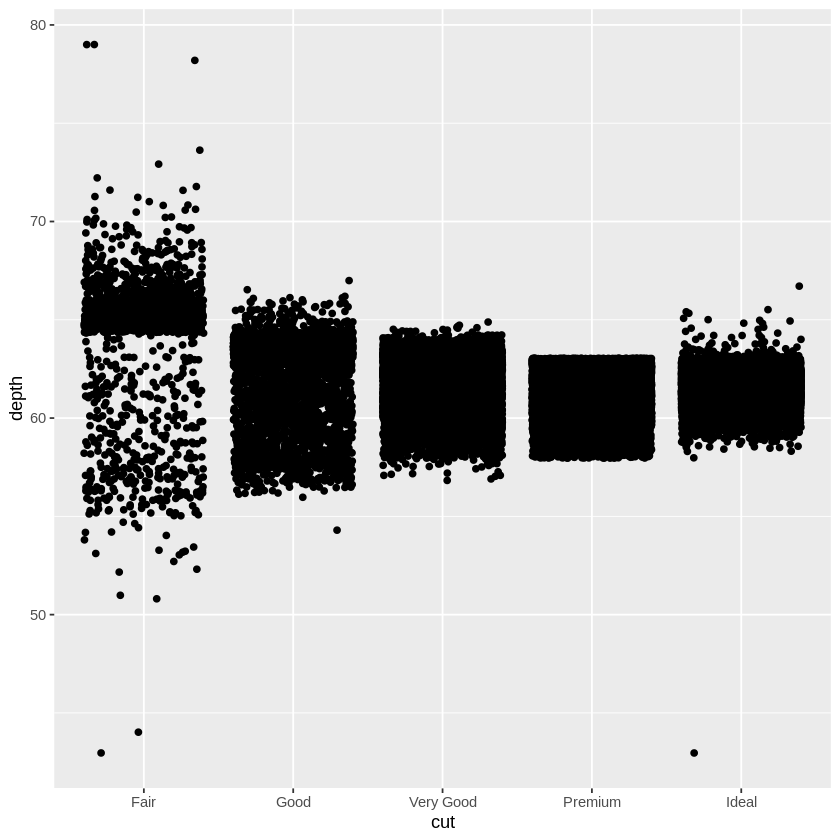

In [0]:
plt + geom_point(position = "jitter")

### **Bar charts**

*   A discrete analogue of a histogram is the bar chart, geom_bar().
*   Instead of partitioning the values into bins like histograms, the bar geom counts the number of instances of each discrete class. The counts are then plotted as columns for each distinct class.



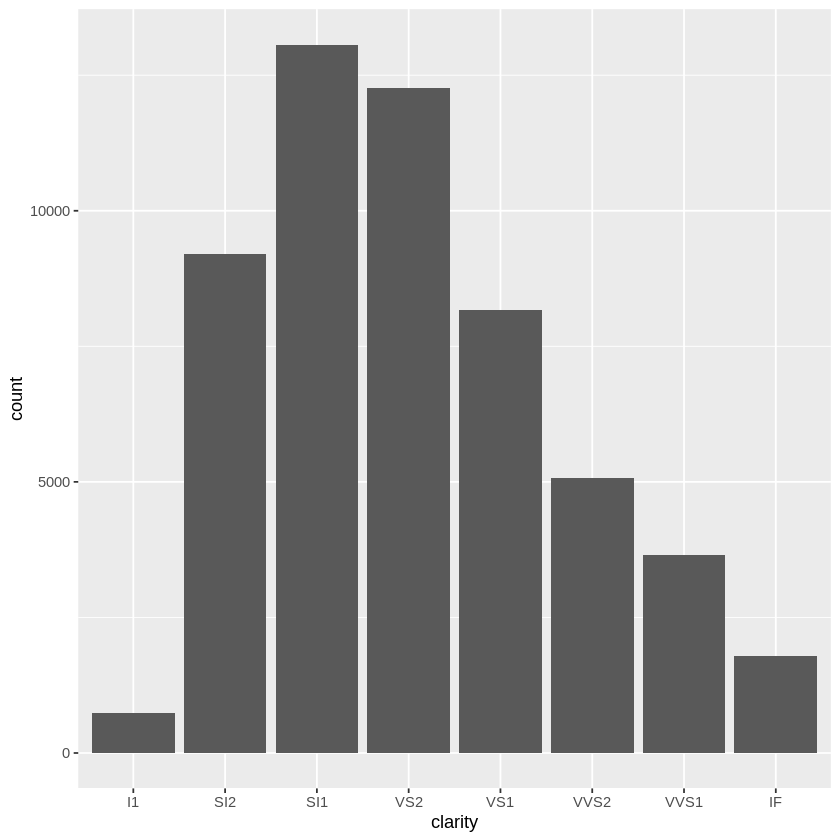

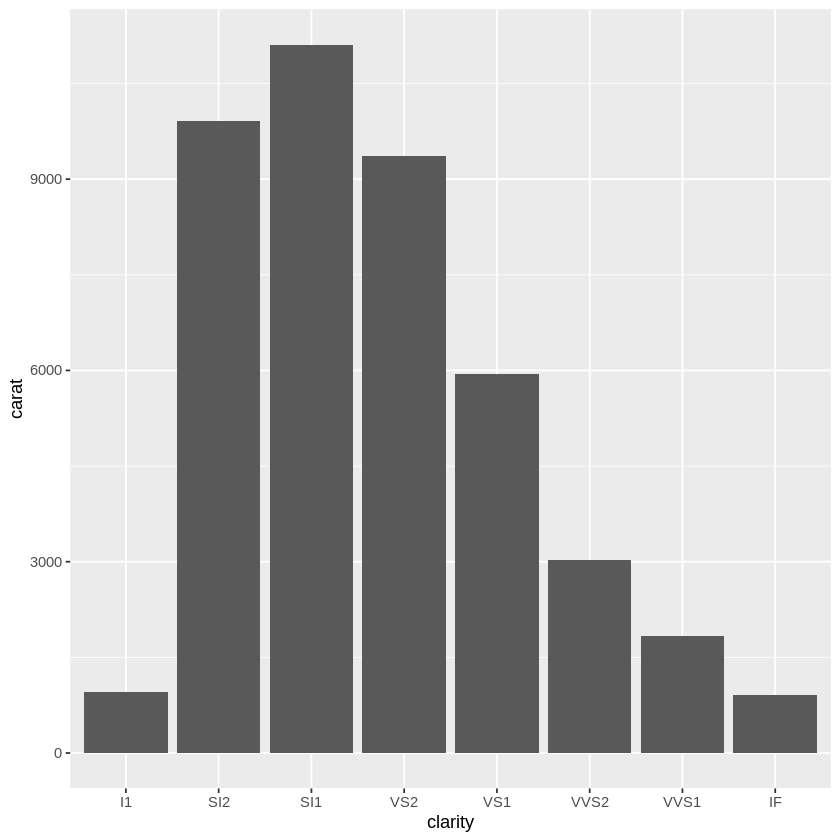

In [0]:
b1 <- ggplot(diamonds, aes(x = clarity)) + geom_bar()
b2 <- ggplot(diamonds, aes(x = clarity)) + geom_bar(aes(weight = carat)) + ylab("carat")
b1
b2

The first plot shows the number of diamonds in each clarity group, and the second plot shows the count weighted by carat.


*   As you see, in ggplot2 it is not necessary tabulate the values, i.e. compute the counts of each category beforehand. The computation is done automatically for you.
*   However, if you have already summarized data, you can still use geom_bar but you need to specify an identity transformation, stat = "identity" rather than the default stat = "count".



In [0]:
diamond.counts <- diamonds %>%
group_by(color) %>%
summarise(count = n())
diamond.counts

color,count
<ord>,<int>
D,6775
E,9797
F,9542
G,11292
H,8304
I,5422
J,2808


With the frequency counts already computed, the default options of the barplot generates an error:

In [0]:
diamond.counts

color,count
<ord>,<int>
D,6775
E,9797
F,9542
G,11292
H,8304
I,5422
J,2808


ERROR while rich displaying an object: Error: stat_count() must not be used with a y aesthetic.

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. pas

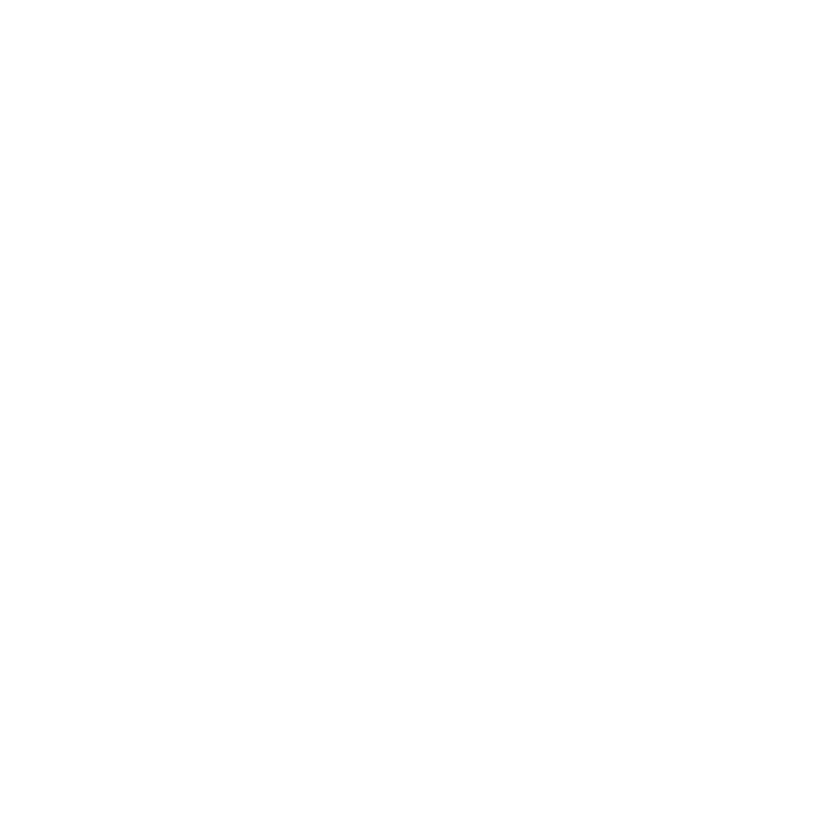

In [0]:
ggplot(diamond.counts, aes(x=color, y=count)) + geom_bar()

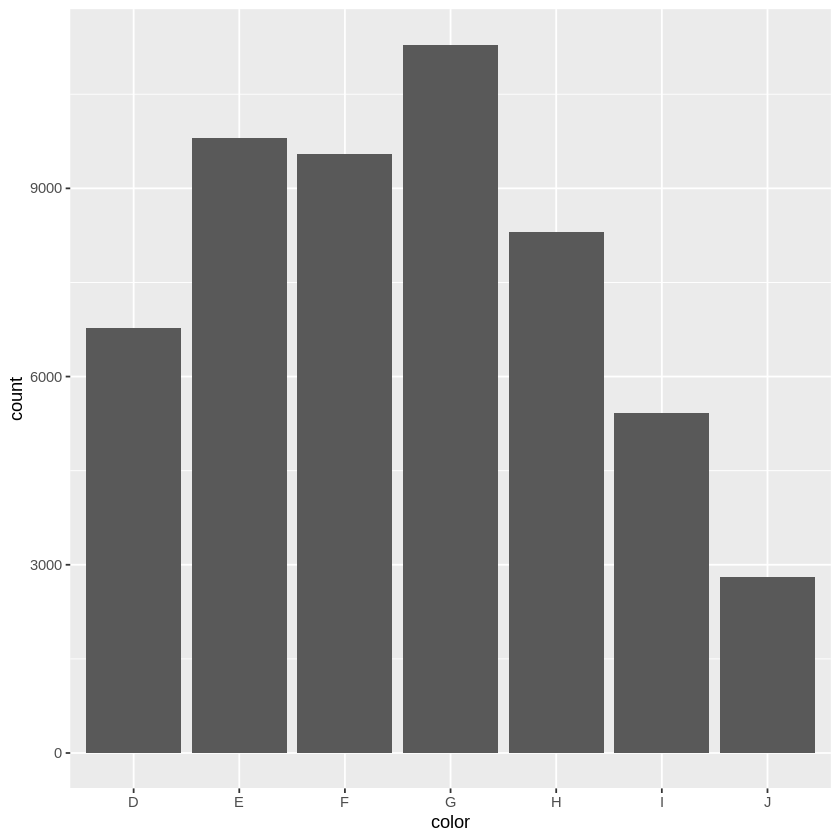

In [0]:
#You need to do the following:
ggplot(diamond.counts, aes(x=color, y=count)) + geom_bar(stat="identity")